In [1]:
%matplotlib inline
import matplotlib.pyplot as plt  # type: ignore
import numpy as np
import numpy.typing as npt

from data.line import line_curve, line_data
from grid.hyperparameters import (ParameterSpace, expand_grid,
                                  full_data_slices, increasing_subslices,
                                  mean_squared_error_metric,
                                  plot_bayesian_probabilities, plot_metrics,
                                  plot_predictions)
from linear_regression import PolynomialBasisBayesianLinearRegression

In [2]:
l_curve = line_curve()
l_data = line_data(n_train=30, n_test=30, noise_stddev=0.3)

In [3]:
%%capture
parameter_spaces = [
    ParameterSpace(
        model=PolynomialBasisBayesianLinearRegression,
        # TODO fix to allow not providing a keyword (in the case that only the data varies)
        keyword="max_evidence_iterations",
        base_parameters={"m_degrees": 2},
        space=[100 for _ in range(10)],
        base_data=l_data,
        data_slices=increasing_subslices(0, 30, 10),
    ),
]

grid = expand_grid(parameter_spaces)

['M', '__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', 'alpha', 'basis_dimensionality', 'beta', 'convergence_threshold', 'fit', 'gamma', 'initial_prior_mean', 'initial_prior_precision', 'likelihood_probability', 'max_evidence_iterations', 'n', 'phi', 'phi_t_phi', 'phi_t_y', 'posterior_covariance', 'posterior_mean', 'posterior_probability', 'predict', 'predictive_probability', 'reestimate_evidence', 'update_posterior', 'w_covariance', 'w_mean', 'w_precision', 'y_t_y']
{'M': 2, 'alpha': 1.8639586665190628, 'beta': 14.470996194396982, 'n': 3, 'y_t_y': 18.791594242709316, 'phi_t_y': array([ 6.98129355, 19.76576899]), 'phi_t_phi': array([[ 3.        ,  

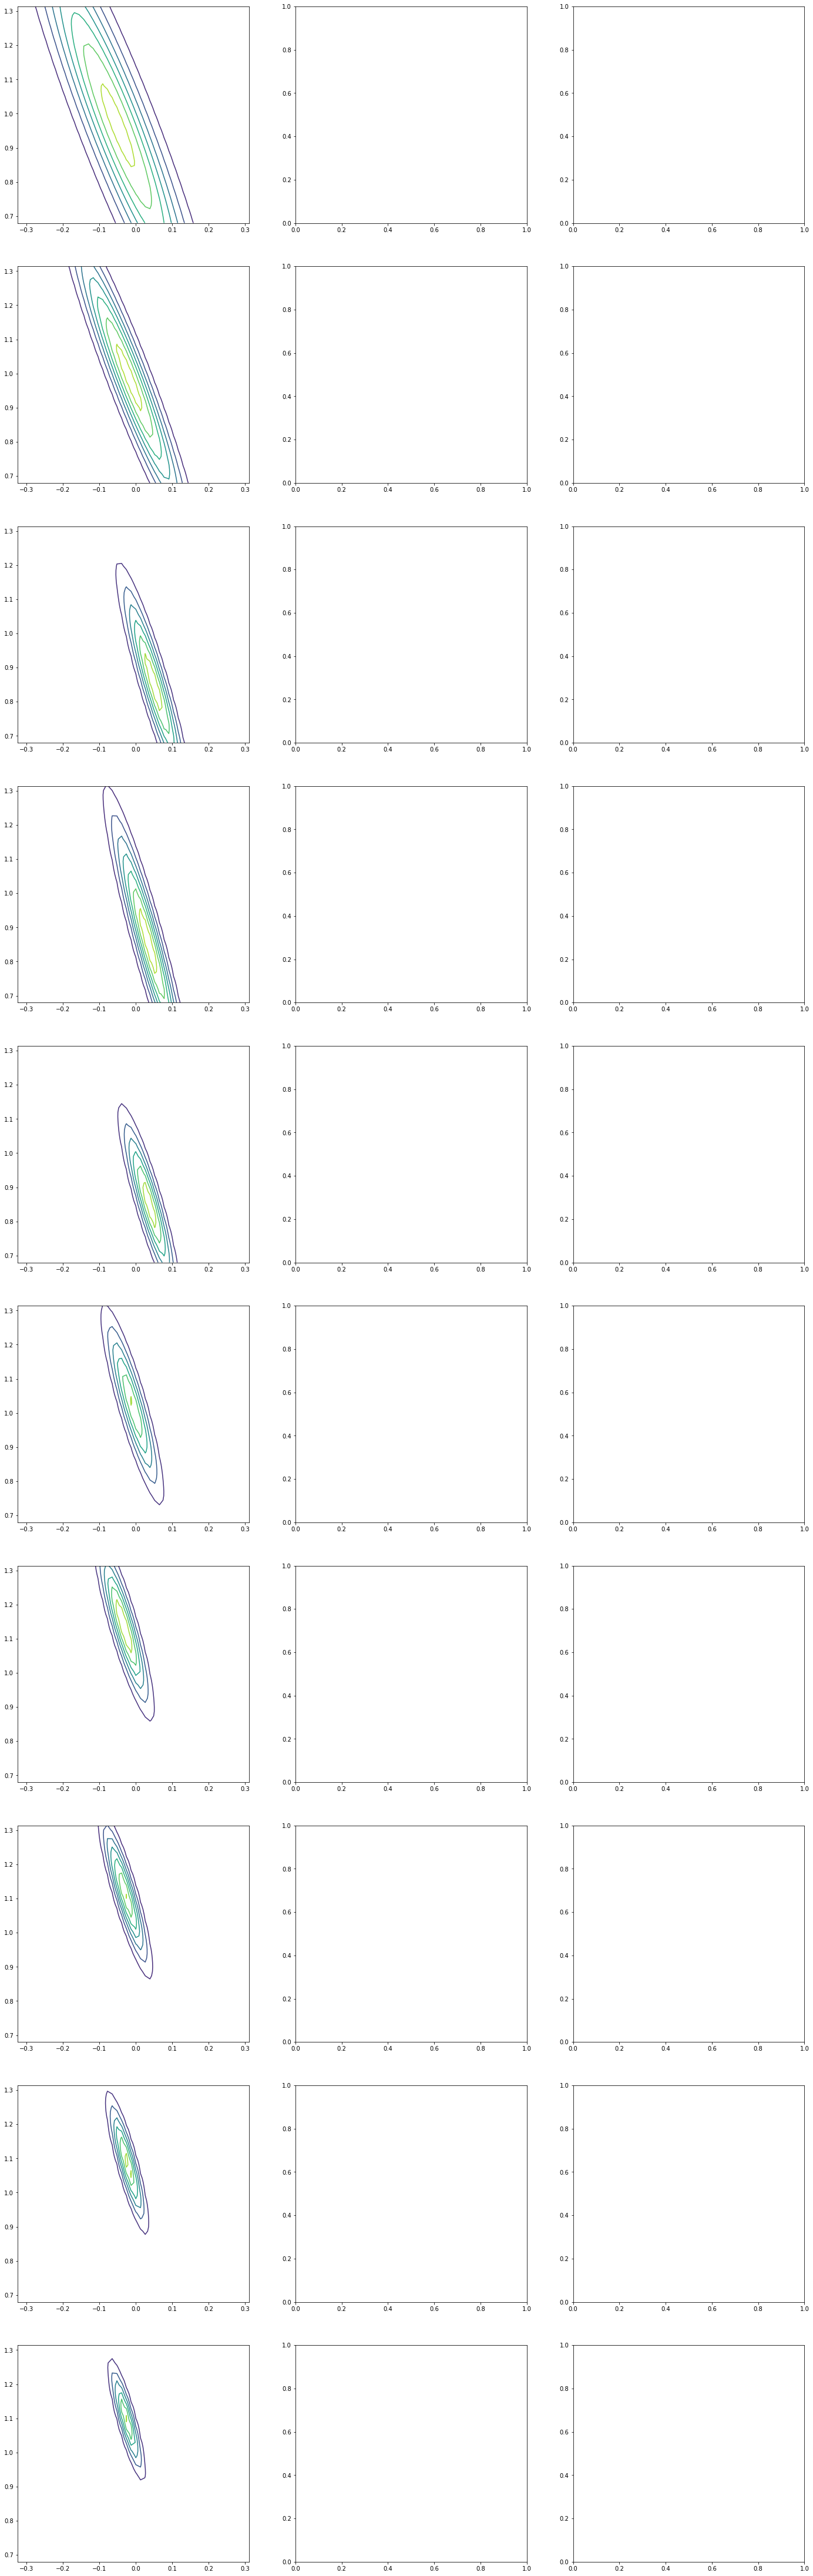

In [4]:
plot_bayesian_probabilities(plt, grid)